In [64]:
import numpy as np
import pandas
import matplotlib as mpl
import matplotlib.pyplot as plt
import mplhep as hep
from scipy import stats
import time
import uproot3
import math
import os

### Format graph appearance
mpl.rc('text', usetex=True)
mpl.rc('legend', fontsize=15, frameon=False)
mpl.rc('font', family='serif', size=10)
mpl.rc('xtick', labelsize=10)
mpl.rc('ytick', labelsize=10)
hep.style.use("CMS")

ModuleNotFoundError: No module named 'scipy'

In [53]:
save_plots = False

infile_name_fullsim = 'h1fullsim-5files.root'

infile_name_fastsim = 'mini-tree_8.3_q2min200k.root'


### Load Full and Fast simulation output trees into uproot
print('\n Loading fullsim\n')
ur_file_fullsim = uproot3.open(infile_name_fullsim)
print ("keys:", ur_file_fullsim.keys())
print ("Django keys:", ur_file_fullsim['Django'].keys())
ur_tree_fullsim = ur_file_fullsim['Django']['minitree']
print("tree:", ur_tree_fullsim)
mc_fullsim = ur_tree_fullsim.pandas.df(['*'], entrystop=3e7,flatten=True)

print('\n Loading fastsim minitree\n')
ur_file_fastsim = uproot3.open(infile_name_fastsim)
print ("keys:", ur_file_fastsim.keys()) 
ur_tree_fastsim = ur_file_fastsim['minitree']
print("tree:", ur_tree_fastsim)
mc_fastsim   =  ur_tree_fastsim.pandas.df(['*'], entrystop=3e7,flatten=True)



###-- fix gen_x in fullsim
mc_fullsim.eval('s = 4*27.6*920', inplace=True) #define collision s
mc_fullsim.eval('gen_x = gen_Q2/(s*gen_y)', inplace=True) #calculate x from Q2, s, y

### Cut fullsim data at gen_Q2 > 200 and remove empty events
mc_fullsim = mc_fullsim.query('gen_Q2>200')
#mc_fullsim = mc_fullsim.query('gen_Q2>7')
mc_fullsim = mc_fullsim.query('Q2_e>0')

#-- remove tail of strange events in fastsim
mc_fastsim = mc_fastsim.query( 'HFS_pt > 2 and HFS_pt < 200')


 Loading fullsim

keys: [b'Django;1']
Django keys: [b'minitree;1', b'DISEvent;1']
tree: <TTree b'minitree' at 0x023383f1a3c8>

 Loading fastsim minitree

keys: [b'minitree;1']
tree: <TTree b'minitree' at 0x0233809e8648>


Full sim bin gen_y>0.5 and gen_y<0.7 filled.
Fast sim bin gen_y>0.5 and gen_y<0.7 filled.
Full sim bin gen_y>0.2 and gen_y<0.5 filled.
Fast sim bin gen_y>0.2 and gen_y<0.5 filled.
Full sim bin gen_y>0.1 and gen_y<0.2 filled.
Fast sim bin gen_y>0.1 and gen_y<0.2 filled.
Full sim bin gen_y>0.05 and gen_y<0.1 filled.
Fast sim bin gen_y>0.05 and gen_y<0.1 filled.
Full sim bin gen_y>0.01 and gen_y<0.05 filled.
Fast sim bin gen_y>0.01 and gen_y<0.05 filled.
Generating plot...


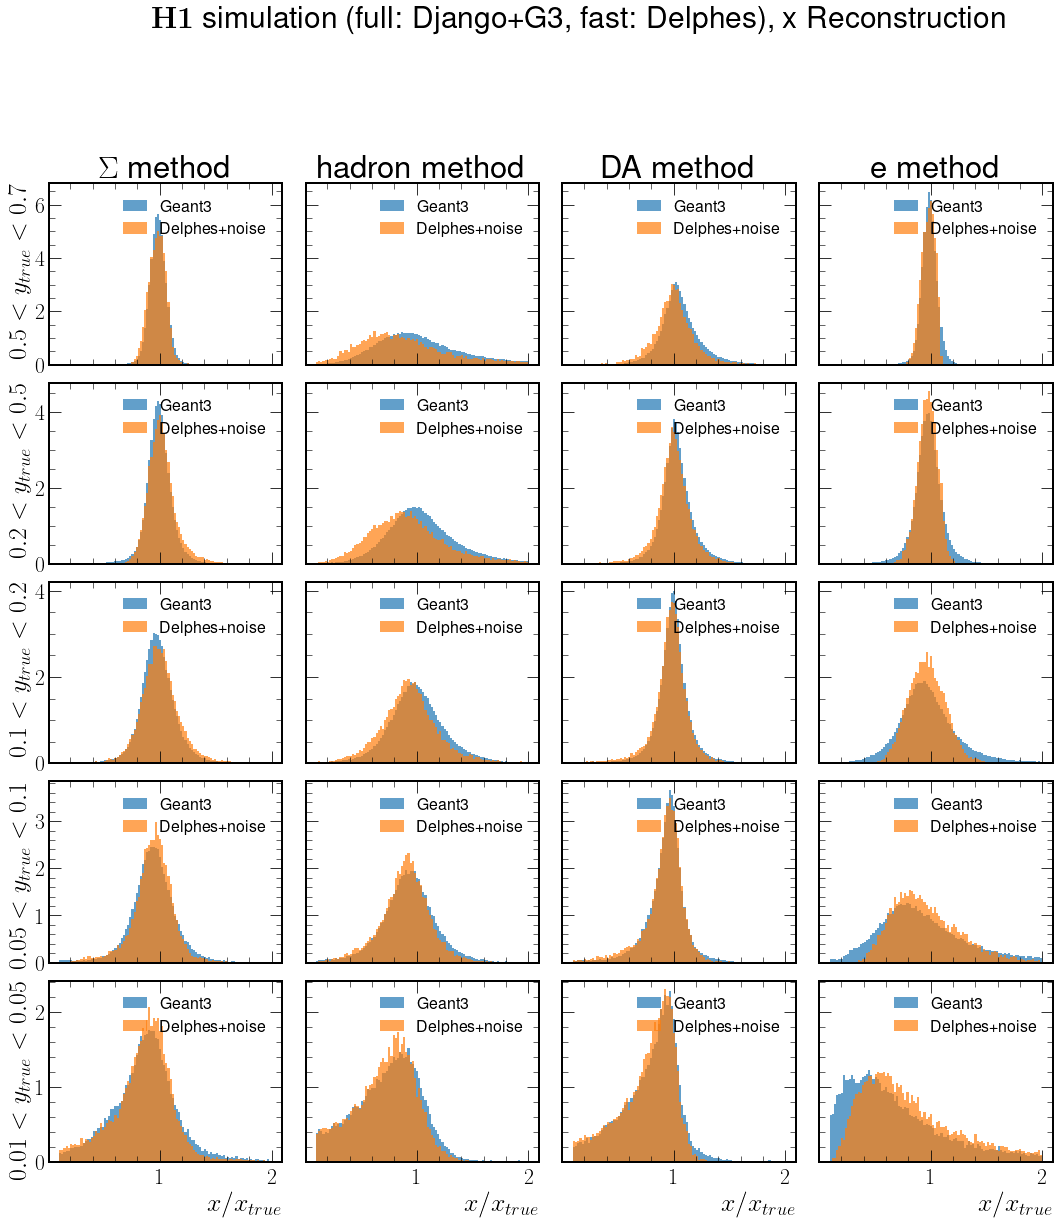

In [60]:
### Plot x reconstruction
fig,ax = plt.subplots(5,4,figsize=(18,18),sharey='row',sharex=True)
ax = ax.flatten()
ybins = np.array(['gen_y>0.5 and gen_y<0.7', 'gen_y>0.2 and gen_y<0.5',
                  'gen_y>0.1 and gen_y<0.2', 'gen_y>0.05 and gen_y<0.1','gen_y>0.01 and gen_y<0.05'])

myalpha=0.7

### Calulate x values for each reconstruction method
mc_fullsim.eval('x_e = Q2_e/(s*y_e)',inplace=True)
mc_fullsim.eval('x_da = Q2_da/(s*y_da)',inplace=True)
mc_fullsim.eval('x_sigma = Q2_sigma/(s*y_sigma)',inplace=True)
mc_fullsim.eval('x_esigma = x_sigma',inplace=True) 
mc_fullsim.eval('x_h = Q2_h/(s*y_h)',inplace=True)

### Calulate x ratios for each method
mc_fullsim.eval('xe_ratio = x_e/gen_x',inplace=True)
mc_fullsim.eval('xda_ratio = x_da/gen_x',inplace=True)
mc_fullsim.eval('xsigma_ratio = x_sigma/gen_x',inplace=True)
mc_fullsim.eval('xesigma_ratio = x_esigma/gen_x',inplace=True)
mc_fullsim.eval('xh_ratio = x_h/gen_x',inplace=True)


mc_fastsim.eval('xe_ratio = x_e/gen_x',inplace=True)
mc_fastsim.eval('xda_ratio = x_da/gen_x',inplace=True)
mc_fastsim.eval('xsigma_ratio = x_sigma/gen_x',inplace=True)
mc_fastsim.eval('xh_ratio = x_h/gen_x',inplace=True)

for i in range(5):
    ### Plot full sim data
    temp_full = mc_fullsim.query(ybins[i])
    ax[3 + 4*i].hist(temp_full['xe_ratio'],weights=temp_full['wgt'],density=True,bins=100,range=(0.1,2),alpha=myalpha,label='Geant3')
    ax[2 + 4*i].hist(temp_full['xda_ratio'],weights=temp_full['wgt'],density=True,bins=100,range=(0.1,2),alpha=myalpha,label='Geant3')
    ax[1 + 4*i].hist(temp_full['xh_ratio'],weights=temp_full['wgt'],density=True,bins=100,range=(0.1,2),alpha=myalpha,label='Geant3')
    ax[0 + 4*i].hist(temp_full['xsigma_ratio'],weights=temp_full['wgt'],density=True,bins=100,range=(0.1,2),alpha=myalpha,label='Geant3')
    print("Full sim bin", ybins[i], "filled.")
    
    ### Plot fast sim data
    temp_fast = mc_fastsim.query(ybins[i])
    ax[3 + 4*i].hist(temp_fast['xe_ratio'],density=True,bins=100,range=(0.1,2),alpha=myalpha,label=delphes_label)
    ax[2 + 4*i].hist(temp_fast['xda_ratio'],density=True,bins=100,range=(0.1,2),alpha=myalpha,label=delphes_label)
    ax[1 + 4*i].hist(temp_fast['xh_ratio'],density=True,bins=100,range=(0.1,2),alpha=myalpha,label=delphes_label)
    ax[0 + 4*i].hist(temp_fast['xsigma_ratio'],density=True,bins=100,range=(0.1,2),alpha=myalpha,label=delphes_label)
    print("Fast sim bin", ybins[i], "filled.")

### Label x reconstruction graph    
ax[0].set_title('$\Sigma$ method')
ax[1].set_title('hadron method')
ax[2].set_title('DA method')
ax[3].set_title('e method')

ax[0].set_ylabel(' $0.5<y_{true}<0.7$')
ax[4].set_ylabel(' $0.2<y_{true}<0.5$')
ax[8].set_ylabel(' $0.1<y_{true}<0.2$')
ax[12].set_ylabel(' $0.05<y_{true}<0.1$')
ax[16].set_ylabel(' $0.01<y_{true}<0.05$')

ax[-1].set_xlabel(r'$x/x_{true}$ ')
ax[-2].set_xlabel(r'$x/x_{true}$ ')
ax[-3].set_xlabel(r'$x/x_{true}$ ')
ax[-4].set_xlabel(r'$x/x_{true}$ ')

for i in range(len(ax.flatten())):
    ax[i].legend(loc='best',fontsize=16)    
plt.subplots_adjust(wspace=0.1, hspace=0.1)

ax[0].text(4.75, 12.9,r"$\bf{H1}$"+' simulation (full: Django+G3, fast: Delphes), x Reconstruction',
                 horizontalalignment='center',multialignment='center',
verticalalignment='center', fontsize=30)
print("Generating plot...")
plt.show()

Bin gen_y>0.5 and gen_y<0.7 filled.
Bin gen_y>0.2 and gen_y<0.5 filled.
Bin gen_y>0.1 and gen_y<0.2 filled.
Bin gen_y>0.05 and gen_y<0.1 filled.
Bin gen_y>0.01 and gen_y<0.05 filled.
Generating plot...


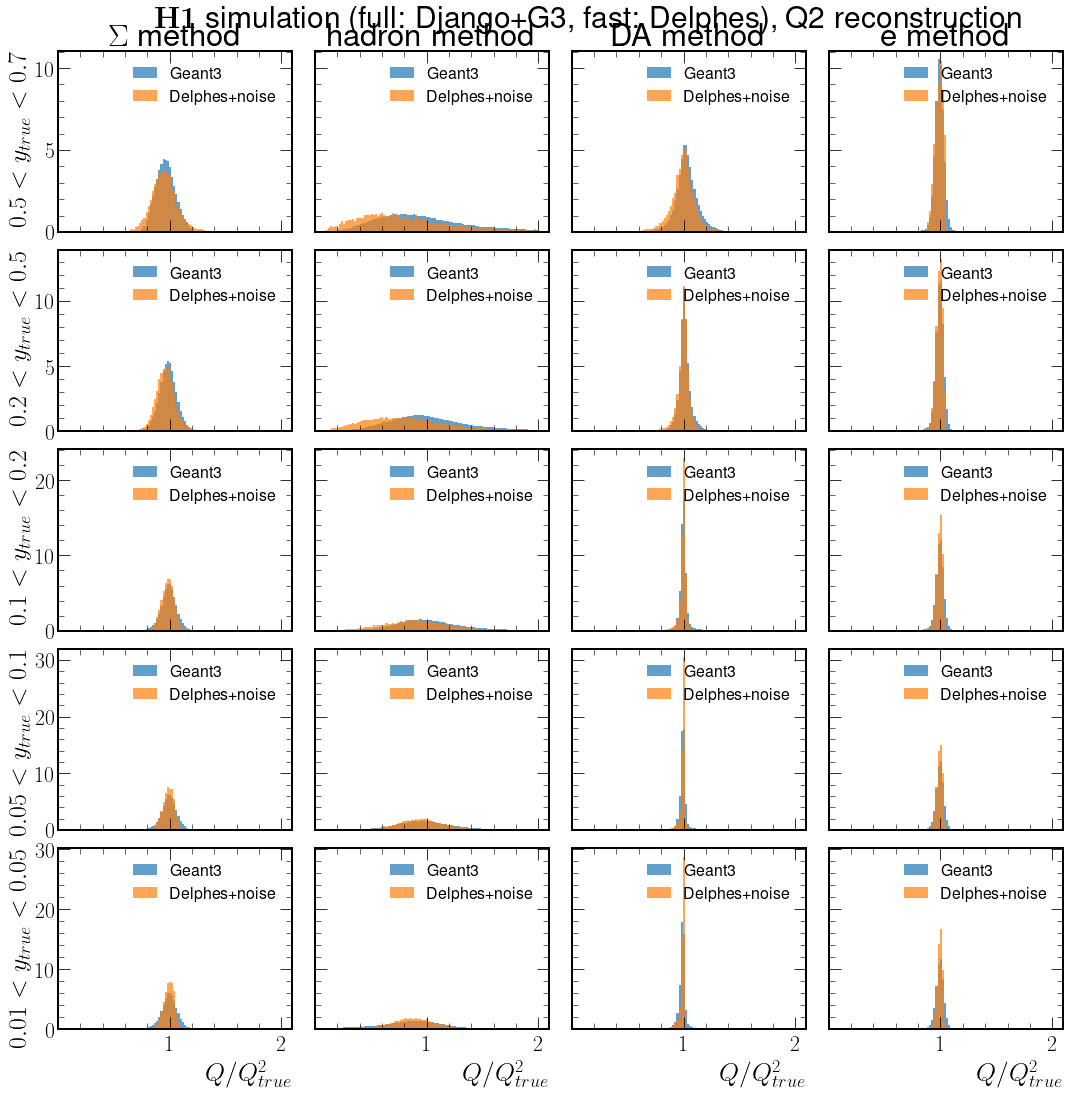

In [77]:
### Plot Q reconstruction histogram
fig,ax = plt.subplots(5,4,figsize=(18,18),sharey='row',sharex=True)
ax = ax.flatten()
#delphes_label = 'Delphes'
delphes_label = 'Delphes+noise'
ybins = np.array(['gen_y>0.5 and gen_y<0.7', 'gen_y>0.2 and gen_y<0.5',
                  'gen_y>0.1 and gen_y<0.2', 'gen_y>0.05 and gen_y<0.1','gen_y>0.01 and gen_y<0.05'])

myalpha=0.7

#Calculate Q2 ratios
mc_fullsim.eval('Q2e_ratio = Q2_e/gen_Q2',inplace=True)
mc_fullsim.eval('Q2da_ratio = Q2_da/gen_Q2',inplace=True)
mc_fullsim.eval('Q2sigma_ratio = Q2_sigma/gen_Q2',inplace=True)
mc_fullsim.eval('Q2h_ratio = Q2_h/gen_Q2',inplace=True)


mc_fastsim.eval('Q2e_ratio = Q2_e/gen_Q2',inplace=True)
mc_fastsim.eval('Q2da_ratio = Q2_da/gen_Q2',inplace=True)
mc_fastsim.eval('Q2sigma_ratio = Q2_sigma/gen_Q2',inplace=True)
mc_fastsim.eval('Q2h_ratio = Q2_h/gen_Q2',inplace=True)


for i in range(5):
    
    temp_full = mc_fullsim.query(ybins[i])
    ax[3 + 4*i].hist(temp_full['Q2e_ratio'],density=True,bins=100,range=(0.1,2),alpha=myalpha,label='Geant3')
    ax[2 + 4*i].hist(temp_full['Q2da_ratio'],density=True,bins=100,range=(0.1,2),alpha=myalpha,label='Geant3')
    ax[1 + 4*i].hist(temp_full['Q2h_ratio'],density=True,bins=100,range=(0.1,2),alpha=myalpha,label='Geant3')
    ax[0 + 4*i].hist(temp_full['Q2sigma_ratio'],density=True,bins=100,range=(0.1,2),alpha=myalpha,label='Geant3')
    
    temp_fast = mc_fastsim.query(ybins[i])
    ax[3 + 4*i].hist(temp_fast['Q2e_ratio'],density=True,bins=100,range=(0.1,2),alpha=myalpha,label=delphes_label)
    ax[2 + 4*i].hist(temp_fast['Q2da_ratio'],density=True,bins=100,range=(0.1,2),alpha=myalpha,label=delphes_label)
    ax[1 + 4*i].hist(temp_fast['Q2h_ratio'],density=True,bins=100,range=(0.1,2),alpha=myalpha,label=delphes_label)
    ax[0 + 4*i].hist(temp_fast['Q2sigma_ratio'],density=True,bins=100,range=(0.1,2),alpha=myalpha,label=delphes_label)
    print("Bin", ybins[i], "filled.")

ax[0].set_title('$\Sigma$ method')
ax[1].set_title('hadron method')
ax[2].set_title('DA method')
ax[3].set_title('e method')

ax[0].set_ylabel(' $0.5<y_{true}<0.7$')
ax[4].set_ylabel(' $0.2<y_{true}<0.5$')
ax[8].set_ylabel(' $0.1<y_{true}<0.2$')
ax[12].set_ylabel(' $0.05<y_{true}<0.1$')
ax[16].set_ylabel(' $0.01<y_{true}<0.05$')

ax[-1].set_xlabel(r'$Q/Q^{2}_{true}$ ')
ax[-2].set_xlabel(r'$Q/Q^{2}_{true}$ ')
ax[-3].set_xlabel(r'$Q/Q^{2}_{true}$ ')
ax[-4].set_xlabel(r'$Q/Q^{2}_{true}$ ')

for i in range(len(ax.flatten())):
    ax[i].legend(loc='best',fontsize=16)    
plt.subplots_adjust(wspace=0.1, hspace=0.1)

for i in range(len(ax.flatten())):
    ax[i].legend(loc='best',fontsize=16)    
plt.subplots_adjust(wspace=0.1, hspace=0.1)

ax[0].text(4.75, 12.9,r"$\bf{H1}$"+' simulation (full: Django+G3, fast: Delphes), Q2 reconstruction ',
                 horizontalalignment='center',multialignment='center',
verticalalignment='center', fontsize=30)
print("Generating plot...")
plt.show()

In [185]:
import statistics as stat
from tabulate import tabulate
meantable = [['mean','Sigma, full','Sigma, fast','h full','h fast','DA full','DA fast','e full','e fast']]
stdevtable = [['stdev','Sigma, full','Sigma, fast','h full','h fast','DA full','DA fast','e full','e fast']]
ybinlabels = np.array(['0.5<y<0.7', '0.2<y<0.5',
                  '0.1<y<0.2', '0.05<y<0.1','0.01<y<0.05'])

for i in range(5):
    meanrow = [ybinlabels[i]]
    stdevrow = [ybinlabels[i]]
    temp_full = mc_fullsim.query(ybins[i])
    temp_full = temp_full.query("Q2sigma_ratio<20 and Q2da_ratio<20")
    temp_fast = mc_fastsim.query(ybins[i])
    temp_fast = temp_fast.query("Q2sigma_ratio<20 and Q2da_ratio<20")
    
    meanrow.append(stat.mean(temp_full['Q2sigma_ratio']))
    meanrow.append(stat.mean(temp_fast['Q2sigma_ratio']))
    meanrow.append(stat.mean(temp_full['Q2h_ratio']))
    meanrow.append(stat.mean(temp_fast['Q2h_ratio']))
    meanrow.append(stat.mean(temp_full['Q2da_ratio']))
    meanrow.append(stat.mean(temp_fast['Q2da_ratio']))
    meanrow.append(stat.mean(temp_full['Q2e_ratio']))
    meanrow.append(stat.mean(temp_fast['Q2e_ratio']))

    stdevrow.append(stat.stdev(temp_full['Q2sigma_ratio']))
    stdevrow.append(stat.stdev(temp_fast['Q2sigma_ratio']))
    stdevrow.append(stat.stdev(temp_full['Q2h_ratio']))
    stdevrow.append(stat.stdev(temp_fast['Q2h_ratio']))
    stdevrow.append(stat.stdev(temp_full['Q2da_ratio']))
    stdevrow.append(stat.stdev(temp_fast['Q2da_ratio']))
    stdevrow.append(stat.stdev(temp_full['Q2e_ratio']))
    stdevrow.append(stat.stdev(temp_fast['Q2e_ratio']))
    
    meantable.append(meanrow)
    stdevtable.append(stdevrow)
    
    print("Bin ", ybinlabels[i]," filled")



Bin  0.5<y<0.7  filled
Bin  0.2<y<0.5  filled
Bin  0.1<y<0.2  filled
Bin  0.05<y<0.1  filled
Bin  0.01<y<0.05  filled


In [186]:
print(tabulate(meantable, headers='firstrow', tablefmt='fancy_grid'))
print(tabulate(stdevtable, headers='firstrow', tablefmt='fancy_grid'))

╒═════════════╤═══════════════╤═══════════════╤══════════╤══════════╤═══════════╤═══════════╤══════════╤══════════╕
│ mean        │   Sigma, full │   Sigma, fast │   h full │   h fast │   DA full │   DA fast │   e full │   e fast │
╞═════════════╪═══════════════╪═══════════════╪══════════╪══════════╪═══════════╪═══════════╪══════════╪══════════╡
│ 0.5<y<0.7   │      0.964316 │      0.956808 │ 1.09578  │ 0.917129 │  1.02703  │  1.00316  │ 0.991146 │ 0.983114 │
├─────────────┼───────────────┼───────────────┼──────────┼──────────┼───────────┼───────────┼──────────┼──────────┤
│ 0.2<y<0.5   │      0.982629 │      0.971129 │ 1.0988   │ 0.971021 │  1.00866  │  1.00541  │ 0.991675 │ 0.987263 │
├─────────────┼───────────────┼───────────────┼──────────┼──────────┼───────────┼───────────┼──────────┼──────────┤
│ 0.1<y<0.2   │      0.989934 │      0.993237 │ 1.04627  │ 1.42155  │  0.998743 │  0.99363  │ 0.993058 │ 0.99093  │
├─────────────┼───────────────┼───────────────┼──────────┼──────────┼───

All Full mean: 0.9937506190851431
All Full stdev: 0.054912554908211716
All Fast mean: 1.8143171030173961
All Fast stdev: 24.211736863313728


IndexError: index 2 is out of bounds for axis 0 with size 2

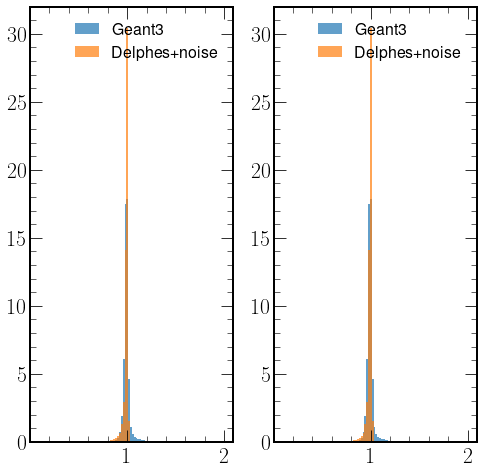

In [188]:
fig,ax = plt.subplots(1,2,figsize=(8,8))

temp_full = mc_fullsim.query(ybins[3])
temp_fast = mc_fastsim.query(ybins[3])
ax[0].hist(temp_full['Q2da_ratio'],density=True,bins=100,range=(0.1,2),alpha=myalpha,label="Geant3")
ax[0].hist(temp_fast['Q2da_ratio'],density=True,bins=100,range=(0.1,2),alpha=myalpha,label=delphes_label)
print("All Full mean:",stat.mean(temp_full['Q2da_ratio']))
print("All Full stdev:",stat.stdev(temp_full['Q2da_ratio']))

print("All Fast mean:",stat.mean(temp_fast['Q2da_ratio']))
print("All Fast stdev:",stat.stdev(temp_fast['Q2da_ratio']))
temp_fastL = mc_fastsim.query('gen_y>0.05 and gen_y<0.1 and Q2da_ratio<20')
temp_fullL = mc_fullsim.query('gen_y>0.05 and gen_y<0.1 and Q2da_ratio<20')
ax[1].hist(temp_fullL['Q2da_ratio'],density=True,bins=100,range=(0.1,2),alpha=myalpha,label="Geant3")
ax[1].hist(temp_fastL['Q2da_ratio'],density=True,bins=100,range=(0.1,2),alpha=myalpha,label=delphes_label)

temp_fastH = mc_fastsim.query('gen_y>0.05 and gen_y<0.1 and Q2da_ratio>20')
temp_fullH = mc_fullsim.query('gen_y>0.05 and gen_y<0.1 and Q2da_ratio>20')

#ax[2].hist(temp_fullH['Q2da_ratio'],density=True,bins=100,range=(0.1,1000),alpha=myalpha,label="Geant3")
#ax[2].hist(temp_fastH['Q2da_ratio'],density=True,bins=100,range=(0.1,1000),alpha=myalpha,label=delphes_label)

ax[0].legend(loc='best',fontsize=16) 
ax[1].legend(loc='best',fontsize=16) 
ax[2].legend(loc='best',fontsize=16) 

plt.show()

#print(temp_full['Q2da_ratio'])
#print(temp_fast['Q2da_ratio'])


print("Q2<20 Full mean:",stat.mean(temp_full['Q2da_ratio']))
print("Q2<20 Full stdev:",stat.stdev(temp_full['Q2da_ratio']))

print("Q2<20 Fast mean:",stat.mean(temp_fast['Q2da_ratio']))
print("Q2<20 Fast stdev:",stat.stdev(temp_fast['Q2da_ratio']))

#temp_fast = mc_fastsim.query('Q2da_ratio>1.7')
#sum(temp_full['Q2da_ratio'])/len(temp_full['Q2da_ratio'])
#temp_full['Q2da_ratio']

In [72]:
for i in range(5):
    print(i)

0
1
2
3
4


In [84]:
temp_full['wgt']

entry
47         0.019038
256        0.029584
324        0.088969
576        0.029620
648        0.008617
             ...   
4962644    0.299841
4962782    0.021608
4962793    0.102676
4962840    0.018711
4963045    0.305282
Name: wgt, Length: 67099, dtype: float32

In [41]:
ebeam_e = 27.6
ebeam_p = 920

def calc_gen_vals_of_xyQ2_from_gen_HFS( df ):
    
    temp = df
    
    temp['log10_gen_x'] = np.log10( temp['gen_x'] )
    temp['log10_gen_Q2'] = np.log10( temp['gen_Q2'] )
    
    #calculate sigma, T, and gamma from generated HFS
    temp.eval( 'Sigma__gen_HFS = gen_HFS_e - gen_HFS_pz', inplace=True )
    temp.eval( 'T__gen_HFS = gen_HFS_pt', inplace=True )
    temp.eval( 'tan_gamma_over_2__gen_HFS = Sigma__gen_HFS / T__gen_HFS', inplace=True )


   #-- Sigma 
    temp.eval( 'y_sigma__gen_HFS = Sigma__gen_HFS / (Sigma__gen_HFS + gen_e_e*(1-cos(gen_e_theta)))', inplace=True )
    temp.eval( 'Q2_sigma__gen_HFS = (gen_e_e*sin(gen_e_theta)) * (gen_e_e*sin(gen_e_theta)) / (1-y_sigma__gen_HFS)', inplace=True )
    temp.eval( 'x_sigma__gen_HFS = Q2_sigma__gen_HFS / ( y_sigma__gen_HFS * gen_s)', inplace=True )
    
    temp.eval('yratio_sigma__gen_HFS = y_sigma__gen_HFS / gen_y', inplace=True )
    temp.eval('xratio_sigma__gen_HFS = x_sigma__gen_HFS / gen_x', inplace=True )
    temp.eval('Q2ratio_sigma__gen_HFS = Q2_sigma__gen_HFS / gen_Q2', inplace=True )  
    
    temp['log10_x_sigma__gen_HFS'] = np.log10( temp['x_sigma__gen_HFS'])
    temp['log10_Q2_sigma__gen_HFS'] = np.log10( temp['Q2_sigma__gen_HFS'])
    
    
   #-- DA
    temp['gen_e_tan_theta_over_2'] = np.tan(temp['gen_e_theta']/2.)
    
    temp.eval( 'y_da__gen_HFS = tan_gamma_over_2__gen_HFS/(tan_gamma_over_2__gen_HFS + gen_e_tan_theta_over_2)', inplace=True)    
    temp.eval( 'Q2_da__gen_HFS = 4 * %f * %f * (1./gen_e_tan_theta_over_2) / (tan_gamma_over_2__gen_HFS + gen_e_tan_theta_over_2)' % (ebeam_e, ebeam_e), inplace=True)  
    temp.eval( 'x_da__gen_HFS = Q2_da__gen_HFS / ( y_da__gen_HFS * gen_s )', inplace=True )

    temp.eval('yratio_da__gen_HFS = y_da__gen_HFS / gen_y', inplace=True )
    temp.eval('xratio_da__gen_HFS = x_da__gen_HFS / gen_x', inplace=True )
    temp.eval('Q2ratio_da__gen_HFS = Q2_da__gen_HFS / gen_Q2', inplace=True ) 

    temp['log10_x_da__gen_HFS'] = np.log10( temp['x_da__gen_HFS'])
    temp['log10_Q2_da__gen_HFS'] = np.log10( temp['Q2_da__gen_HFS'])
    
    
    
    
   #-- hadron
    temp.eval( 'y_h__gen_HFS = Sigma__gen_HFS / (2 * %f)' % ebeam_e, inplace=True )    
    temp.eval( 'Q2_h__gen_HFS = T__gen_HFS * T__gen_HFS / (1 - y_h__gen_HFS)', inplace=True )  
    temp.eval( 'x_h__gen_HFS = Q2_h__gen_HFS / ( y_h__gen_HFS * gen_s )', inplace=True )
    
    temp.eval('yratio_h__gen_HFS = y_h__gen_HFS / gen_y', inplace=True )
    temp.eval('xratio_h__gen_HFS = x_h__gen_HFS / gen_x', inplace=True )
    temp.eval('Q2ratio_h__gen_HFS = Q2_h__gen_HFS / gen_Q2', inplace=True ) 

    temp = temp.query('x_h__gen_HFS>0')
    temp = temp.query('Q2_h__gen_HFS>0')
    temp['log10_x_h__gen_HFS'] = np.log10( temp['x_h__gen_HFS'])
    temp['log10_Q2_h__gen_HFS'] = np.log10( temp['Q2_h__gen_HFS'])
    
    
    return temp

In [42]:
mc_fastsim = calc_gen_vals_of_xyQ2_from_gen_HFS( mc_fastsim )

Bin gen_y>0.5 and gen_y<0.7 filled.
Bin gen_y>0.2 and gen_y<0.5 filled.
Bin gen_y>0.1 and gen_y<0.2 filled.
Bin gen_y>0.05 and gen_y<0.1 filled.
Bin gen_y>0.01 and gen_y<0.05 filled.
Generating plot...


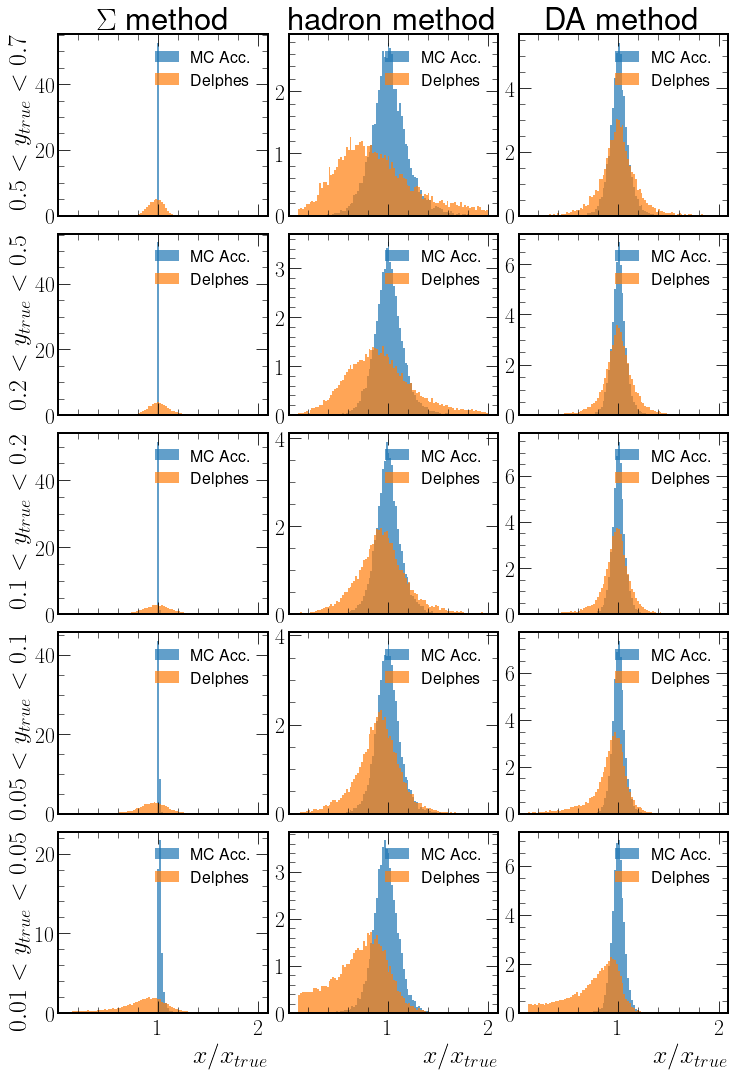

In [45]:
fig,ax = plt.subplots(5,3,figsize=(12,18),sharex=True)
ax = ax.flatten()
ybins = np.array(['gen_y>0.5 and gen_y<0.7', 'gen_y>0.2 and gen_y<0.5',
                  'gen_y>0.1 and gen_y<0.2', 'gen_y>0.05 and gen_y<0.1','gen_y>0.01 and gen_y<0.05'])
myalpha=0.7

for i in range(5):
    temp = mc_fastsim.query(ybins[i])
    ax[2 + 3*i].hist(temp['xratio_da__gen_HFS'],density=True,bins=100,range=(0.1,2),alpha=myalpha,label='MC Acc.')
    ax[1 + 3*i].hist(temp['xratio_h__gen_HFS'],density=True,bins=100,range=(0.1,2),alpha=myalpha,label='MC Acc.')
    ax[0 + 3*i].hist(temp['xratio_sigma__gen_HFS'],density=True,bins=100,range=(0.1,2),alpha=myalpha,label='MC Acc.')
    
    ax[2 + 3*i].hist(temp['xda_ratio'],density=True,bins=100,range=(0.1,2),alpha=myalpha,label='Delphes')
    ax[1 + 3*i].hist(temp['xh_ratio'],density=True,bins=100,range=(0.1,2),alpha=myalpha,label='Delphes')
    ax[0 + 3*i].hist(temp['xsigma_ratio'],density=True,bins=100,range=(0.1,2),alpha=myalpha,label='Delphes')
    print("Bin", ybins[i], "filled.")

#Label graph
ax[0].set_title('$\Sigma$ method')
ax[1].set_title('hadron method')
ax[2].set_title('DA method')

ax[0].set_ylabel(' $0.5<y_{true}<0.7$')
ax[3].set_ylabel(' $0.2<y_{true}<0.5$')
ax[6].set_ylabel(' $0.1<y_{true}<0.2$')
ax[9].set_ylabel(' $0.05<y_{true}<0.1$')
ax[12].set_ylabel(' $0.01<y_{true}<0.05$')

ax[-1].set_xlabel(r'$x/x_{true}$ ')
ax[-2].set_xlabel(r'$x/x_{true}$ ')
ax[-3].set_xlabel(r'$x/x_{true}$ ')


for i in range(len(ax.flatten())):
    ax[i].legend(loc='best',fontsize=16)    
plt.subplots_adjust(wspace=0.1, hspace=0.1)

if save_plots :
    #plt.savefig('plots/gen-HFS-res.pdf',bbox_inches='tight')
    plt.savefig('plots/gen-HFS-res.png',bbox_inches='tight')
print("Generating plot...")
plt.show()

Bin gen_y>0.5 and gen_y<0.7 filled.
Bin gen_y>0.2 and gen_y<0.5 filled.
Bin gen_y>0.1 and gen_y<0.2 filled.
Bin gen_y>0.05 and gen_y<0.1 filled.
Bin gen_y>0.01 and gen_y<0.05 filled.
Generating plot...


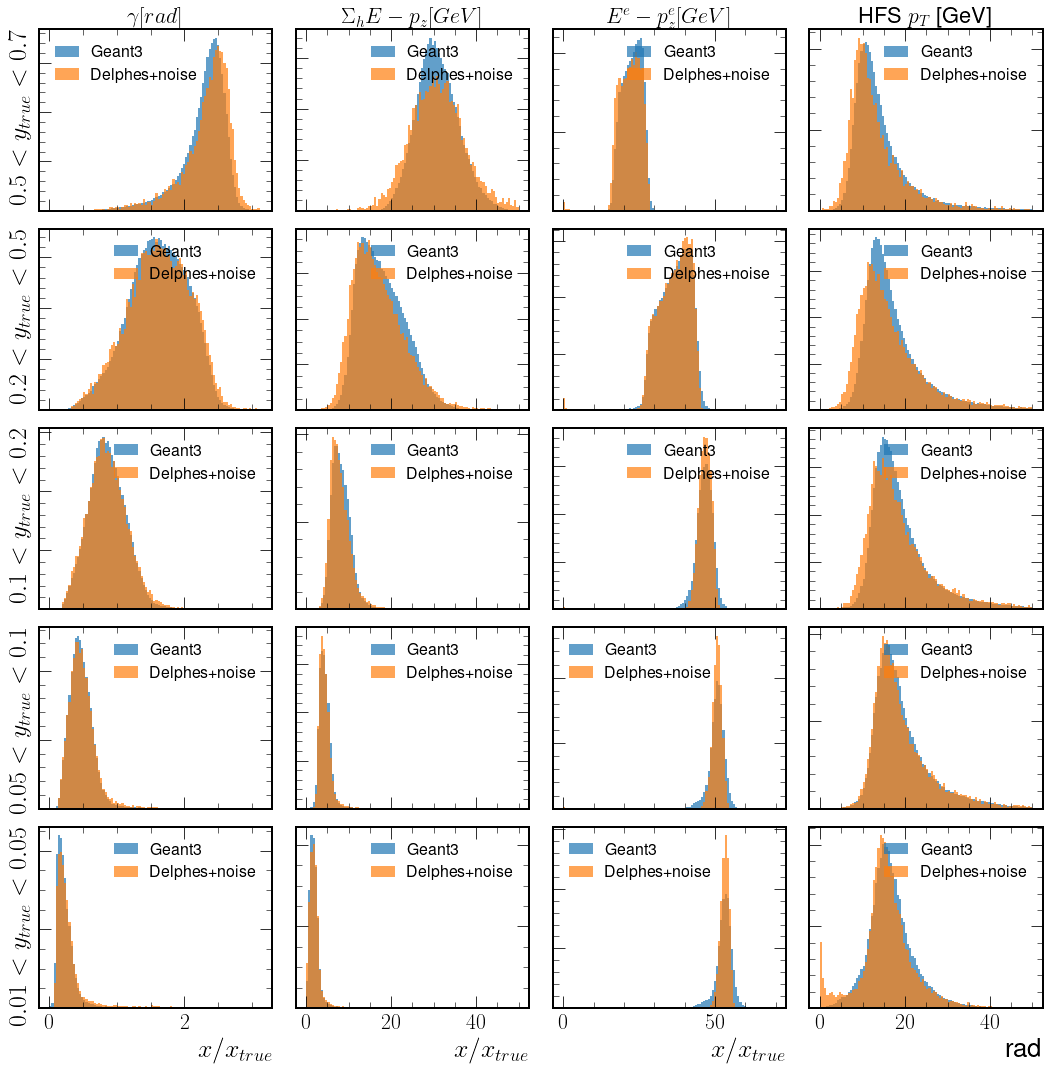

In [50]:
fig,ax = plt.subplots(5,4,figsize=(18,18), sharex='col')
ax = ax.flatten()
ybins = np.array(['gen_y>0.5 and gen_y<0.7', 'gen_y>0.2 and gen_y<0.5',
                  'gen_y>0.1 and gen_y<0.2', 'gen_y>0.05 and gen_y<0.1','gen_y>0.01 and gen_y<0.05'])
myalpha=0.7

#Calculate HFS and electron pt, sigma, gamma
mc_fullsim.eval('HFS_pt = sqrt(HFS_px*HFS_px + HFS_py*HFS_py)', inplace=True ) 
mc_fullsim.eval('HFS_Sigma = HFS_E - HFS_pz', inplace=True )
mc_fullsim.eval('HFS_tan_gamma_over_2 = HFS_Sigma / HFS_pt', inplace=True )
mc_fullsim.eval('HFS_gamma = 2 * arctan(HFS_tan_gamma_over_2)', inplace=True )
mc_fullsim.eval('e_e = sqrt(e_px*e_px + e_py*e_py + e_pz*e_pz)', inplace=True )
mc_fullsim.eval('e_empz = e_e - e_pz', inplace=True )

#note: fast sim HFS pt pre-calculated
mc_fastsim.eval('HFS_Sigma = HFS_E - HFS_pz', inplace=True )
mc_fastsim.eval('HFS_tan_gamma_over_2 = HFS_Sigma / HFS_pt', inplace=True )
mc_fastsim.eval('HFS_gamma = 2 * arctan(HFS_tan_gamma_over_2)', inplace=True )
mc_fastsim.eval('e_e = sqrt(e_px*e_px + e_py*e_py + e_pz*e_pz)', inplace=True )
mc_fastsim.eval('e_empz = e_e - e_pz', inplace=True )

for i in range(5):
    temp_full = mc_fullsim.query(ybins[i])
    ax[0+4*i].hist(temp_full['HFS_gamma'],weights=temp_full['wgt'],density=True,bins=100,range=(0.0,3.14159265),alpha=myalpha,label='Geant3')
    ax[1+4*i].hist(temp_full['HFS_Sigma'],weights=temp_full['wgt'],density=True,bins=100,range=(0,50),alpha=myalpha,label='Geant3')
    ax[2+4*i].hist(temp_full['e_empz'],weights=temp_full['wgt'],density=True,bins=100,range=(0,70),alpha=myalpha,label='Geant3')
    ax[3+4*i].hist(temp_full['HFS_pt'],weights=temp_full['wgt'],density=True,bins=100,range=(0,50),alpha=myalpha,label='Geant3')
    #ax[i][4].hist(temp['HFS_E'],weights=temp['wgt'],density=True,bins=100,range=(0,400),alpha=myalpha,label='Geant3')
    
    temp_fast = mc_fastsim.query(ybins[i])
    ax[0+4*i].hist(temp_fast['HFS_gamma'],density=True,bins=100,range=(0.0,3.14159265),alpha=myalpha,label=delphes_label)
    ax[1+4*i].hist(temp_fast['HFS_Sigma'],density=True,bins=100,range=(0,50),alpha=myalpha,label=delphes_label)
    ax[2+4*i].hist(temp_fast['e_empz'],density=True,bins=100,range=(0,70),alpha=myalpha,label=delphes_label)
    ax[3+4*i].hist(temp_fast['HFS_pt'],density=True,bins=100,range=(0,50),alpha=myalpha,label=delphes_label)
    #ax[i][4].hist(temp['HFS_E'],density=True,bins=100,range=(0,400),alpha=myalpha,label=delphes_label)
    print("Bin", ybins[i], "filled.")


#Label graph
ax[0].set_title('$\gamma [rad]$ ', fontsize=22 )
ax[1].set_title('$\Sigma_{h} E-p_{z} [GeV]$', fontsize=22 )
ax[2].set_title('$E^{e}-p^{e}_{z} [GeV]$', fontsize=22 )
ax[3].set_title('HFS $p_{T}$ [GeV]', fontsize=22 )
#ax[4].set_title('HFS $E$ [GeV]', fontsize=22 )

ax[0].set_ylabel(' $0.5<y_{true}<0.7$')
ax[4].set_ylabel(' $0.2<y_{true}<0.5$')
ax[8].set_ylabel(' $0.1<y_{true}<0.2$')
ax[12].set_ylabel(' $0.05<y_{true}<0.1$')
ax[16].set_ylabel(' $0.01<y_{true}<0.05$')

ax[-1].set_xlabel(r'rad')
ax[-2].set_xlabel(r'$x/x_{true}$ ')
ax[-3].set_xlabel(r'$x/x_{true}$ ')
ax[-4].set_xlabel(r'$x/x_{true}$ ')

for i in range(len(ax.flatten())):
    ax[i].legend(loc='best',fontsize=16)  
    ax[i].set_yticklabels([])
plt.subplots_adjust(wspace=0.1, hspace=0.1)
#plt.xticks(fontsize=2)
#plt.yticks(fontsize=2)
print("Generating plot...")
plt.show()

['gen_y>0.5 and gen_y<0.7' 'gen_y>0.2 and gen_y<0.5'
 'gen_y>0.1 and gen_y<0.2' 'gen_y>0.05 and gen_y<0.1'
 'gen_y>0.01 and gen_y<0.05']


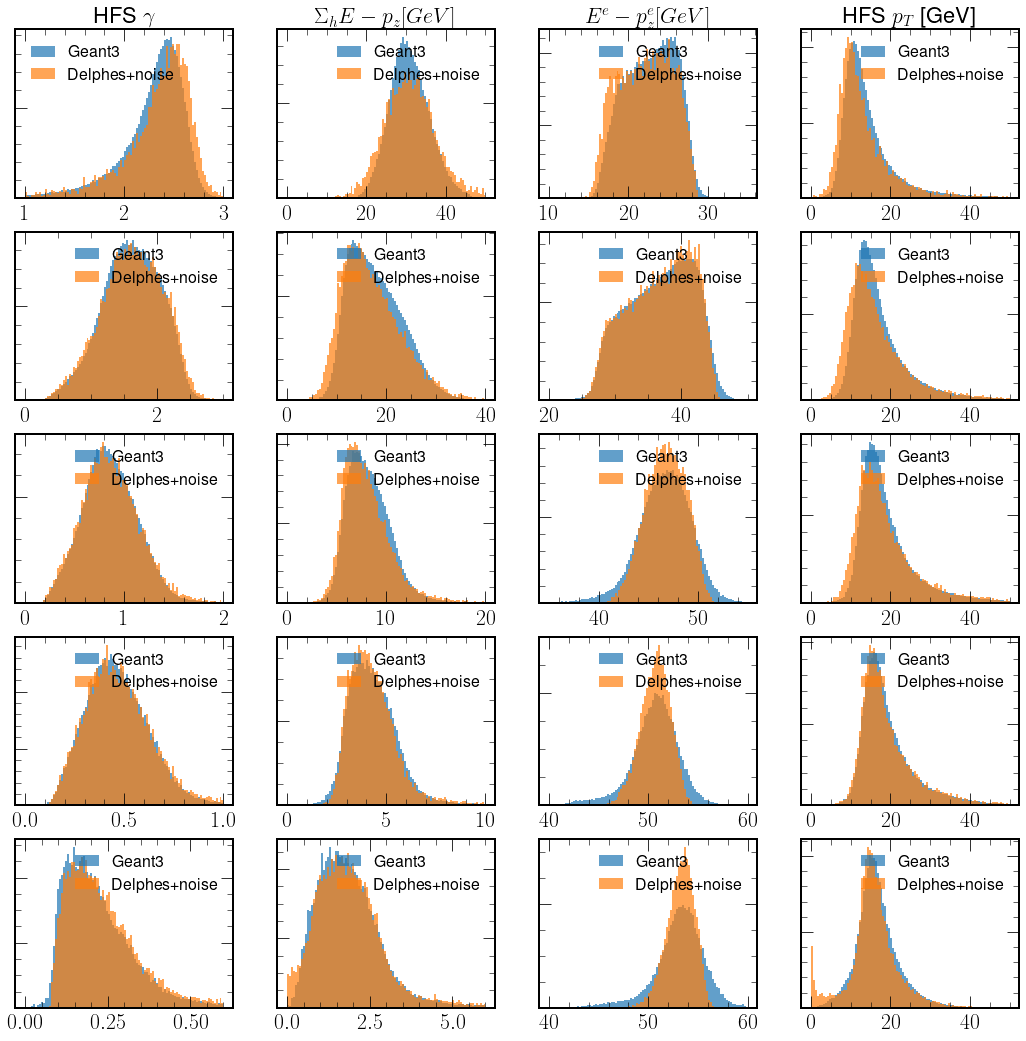

In [51]:
fig,ax = plt.subplots(5,4,figsize=(18,18))

ybins = np.array(['gen_y>0.5 and gen_y<0.7', 'gen_y>0.2 and gen_y<0.5',
                  'gen_y>0.1 and gen_y<0.2', 'gen_y>0.05 and gen_y<0.1','gen_y>0.01 and gen_y<0.05'])
print(ybins)

myalpha=0.7


temp = mc_fullsim.query(ybins[0])
ax[0][0].hist(temp['HFS_gamma'],weights=temp['wgt'],density=True,bins=100,range=(1,3),alpha=myalpha,label='Geant3')
ax[0][1].hist(temp['HFS_Sigma'],weights=temp['wgt'],density=True,bins=100,range=(0,50),alpha=myalpha,label='Geant3')
ax[0][2].hist(temp['e_empz'],weights=temp['wgt'],density=True,bins=100,range=(10,35),alpha=myalpha,label='Geant3')
ax[0][3].hist(temp['HFS_pt'],weights=temp['wgt'],density=True,bins=100,range=(0,50),alpha=myalpha,label='Geant3')
#ax[0][4].hist(temp['HFS_E'],weights=temp['wgt'],density=True,bins=100,range=(0,200),alpha=myalpha,label='Geant3')

temp = mc_fullsim.query(ybins[1])
ax[1][0].hist(temp['HFS_gamma'],weights=temp['wgt'],density=True,bins=100,range=(0,3),alpha=myalpha,label='Geant3')
ax[1][1].hist(temp['HFS_Sigma'],weights=temp['wgt'],density=True,bins=100,range=(0,40),alpha=myalpha,label='Geant3')
ax[1][2].hist(temp['e_empz'],weights=temp['wgt'],density=True,bins=100,range=(20,50),alpha=myalpha,label='Geant3')
ax[1][3].hist(temp['HFS_pt'],weights=temp['wgt'],density=True,bins=100,range=(0,50),alpha=myalpha,label='Geant3')
#ax[1][4].hist(temp['HFS_E'],weights=temp['wgt'],density=True,bins=100,range=(0,200),alpha=myalpha,label='Geant3')

temp = mc_fullsim.query(ybins[2])
ax[2][0].hist(temp['HFS_gamma'],weights=temp['wgt'],density=True,bins=100,range=(0,2),alpha=myalpha,label='Geant3')
ax[2][1].hist(temp['HFS_Sigma'],weights=temp['wgt'],density=True,bins=100,range=(0,20),alpha=myalpha,label='Geant3')
ax[2][2].hist(temp['e_empz'],weights=temp['wgt'],density=True,bins=100,range=(35,55),alpha=myalpha,label='Geant3')
ax[2][3].hist(temp['HFS_pt'],weights=temp['wgt'],density=True,bins=100,range=(0,50),alpha=myalpha,label='Geant3')
#ax[2][4].hist(temp['HFS_E'],weights=temp['wgt'],density=True,bins=100,range=(0,200),alpha=myalpha,label='Geant3')

temp = mc_fullsim.query(ybins[3])
ax[3][0].hist(temp['HFS_gamma'],weights=temp['wgt'],density=True,bins=100,range=(0,1),alpha=myalpha,label='Geant3')
ax[3][1].hist(temp['HFS_Sigma'],weights=temp['wgt'],density=True,bins=100,range=(0,10),alpha=myalpha,label='Geant3')
ax[3][2].hist(temp['e_empz'],weights=temp['wgt'],density=True,bins=100,range=(40,60),alpha=myalpha,label='Geant3')
ax[3][3].hist(temp['HFS_pt'],weights=temp['wgt'],density=True,bins=100,range=(0,50),alpha=myalpha,label='Geant3')
#ax[3][4].hist(temp['HFS_E'],weights=temp['wgt'],density=True,bins=100,range=(0,300),alpha=myalpha,label='Geant3')

temp = mc_fullsim.query(ybins[4])
ax[4][0].hist(temp['HFS_gamma'],weights=temp['wgt'],density=True,bins=100,range=(0,0.6),alpha=myalpha,label='Geant3')
ax[4][1].hist(temp['HFS_Sigma'],weights=temp['wgt'],density=True,bins=100,range=(0,6),alpha=myalpha,label='Geant3')
ax[4][2].hist(temp['e_empz'],weights=temp['wgt'],density=True,bins=100,range=(40,60),alpha=myalpha,label='Geant3')
ax[4][3].hist(temp['HFS_pt'],weights=temp['wgt'],density=True,bins=100,range=(0,50),alpha=myalpha,label='Geant3')
#ax[4][4].hist(temp['HFS_E'],weights=temp['wgt'],density=True,bins=100,range=(0,400),alpha=myalpha,label='Geant3')






temp = mc_fastsim.query(ybins[0])
ax[0][0].hist(temp['HFS_gamma'],density=True,bins=100,range=(1,3),alpha=myalpha,label=delphes_label)
ax[0][1].hist(temp['HFS_Sigma'],density=True,bins=100,range=(0,50),alpha=myalpha,label=delphes_label)
ax[0][2].hist(temp['e_empz'],density=True,bins=100,range=(10,35),alpha=myalpha,label=delphes_label)
ax[0][3].hist(temp['HFS_pt'],density=True,bins=100,range=(0,50),alpha=myalpha,label=delphes_label)
#ax[0][4].hist(temp['HFS_E'],density=True,bins=100,range=(0,200),alpha=myalpha,label=delphes_label)


temp = mc_fastsim.query(ybins[1])
ax[1][0].hist(temp['HFS_gamma'],density=True,bins=100,range=(0,3),alpha=myalpha,label=delphes_label)
ax[1][1].hist(temp['HFS_Sigma'],density=True,bins=100,range=(0,40),alpha=myalpha,label=delphes_label)
ax[1][2].hist(temp['e_empz'],density=True,bins=100,range=(20,50),alpha=myalpha,label=delphes_label)
ax[1][3].hist(temp['HFS_pt'],density=True,bins=100,range=(0,50),alpha=myalpha,label=delphes_label)
#ax[1][4].hist(temp['HFS_E'],density=True,bins=100,range=(0,200),alpha=myalpha,label=delphes_label)


temp = mc_fastsim.query(ybins[2])
ax[2][0].hist(temp['HFS_gamma'],density=True,bins=100,range=(0,2),alpha=myalpha,label=delphes_label)
ax[2][1].hist(temp['HFS_Sigma'],density=True,bins=100,range=(0,20),alpha=myalpha,label=delphes_label)
ax[2][2].hist(temp['e_empz'],density=True,bins=100,range=(35,55),alpha=myalpha,label=delphes_label)
ax[2][3].hist(temp['HFS_pt'],density=True,bins=100,range=(0,50),alpha=myalpha,label=delphes_label)
#ax[2][4].hist(temp['HFS_E'],density=True,bins=100,range=(0,200),alpha=myalpha,label=delphes_label)


temp = mc_fastsim.query(ybins[3])
ax[3][0].hist(temp['HFS_gamma'],density=True,bins=100,range=(0,1),alpha=myalpha,label=delphes_label)
ax[3][1].hist(temp['HFS_Sigma'],density=True,bins=100,range=(0,10),alpha=myalpha,label=delphes_label)
ax[3][2].hist(temp['e_empz'],density=True,bins=100,range=(40,60),alpha=myalpha,label=delphes_label)
ax[3][3].hist(temp['HFS_pt'],density=True,bins=100,range=(0,50),alpha=myalpha,label=delphes_label)
#ax[3][4].hist(temp['HFS_E'],density=True,bins=100,range=(0,300),alpha=myalpha,label=delphes_label)

temp = mc_fastsim.query(ybins[4])
ax[4][0].hist(temp['HFS_gamma'],density=True,bins=100,range=(0,0.6),alpha=myalpha,label=delphes_label)
ax[4][1].hist(temp['HFS_Sigma'],density=True,bins=100,range=(0,6),alpha=myalpha,label=delphes_label)
ax[4][2].hist(temp['e_empz'],density=True,bins=100,range=(40,60),alpha=myalpha,label=delphes_label)
ax[4][3].hist(temp['HFS_pt'],density=True,bins=100,range=(0,50),alpha=myalpha,label=delphes_label)
#ax[4][4].hist(temp['HFS_E'],density=True,bins=100,range=(0,400),alpha=myalpha,label=delphes_label)





        
    
plt.subplots_adjust(wspace=0.2, hspace=0.2)



ax = ax.flatten()

ax[0].set_title('HFS $\gamma$ ', fontsize=22 )
ax[1].set_title('$\Sigma_{h} E-p_{z} [GeV]$', fontsize=22 )
ax[2].set_title('$E^{e}-p^{e}_{z} [GeV]$', fontsize=22 )
ax[3].set_title('HFS $p_{T}$ [GeV]', fontsize=22 )
#ax[4].set_title('HFS $E$ [GeV]', fontsize=22 )

for i in range(len(ax.flatten())):
    ax[i].legend(loc='best',fontsize=16)  
    ax[i].set_yticklabels([])
plt.subplots_adjust(wspace=0.2, hspace=0.2)


plt.show()

In [24]:
mc_fullsim.eval('genHFS_pt = sqrt( genHFS_px*genHFS_px + genHFS_py*genHFS_py)', inplace=True )
mc_fullsim.eval('HFSpt_res = HFS_pt/genHFS_pt - 1', inplace=True )

mc_fullsim.eval('e_pt = sqrt(e_px*e_px + e_py*e_py)', inplace=True )
mc_fullsim.eval('gene_pt = sqrt(gene_px*gene_px + gene_py*gene_py)', inplace=True )
mc_fullsim.eval('pt_res = e_pt/gene_pt - 1', inplace=True )
mc_fullsim.eval('gene_p = sqrt(gene_px*gene_px + gene_py*gene_py + gene_pz*gene_pz)', inplace=True )
mc_fullsim.eval('p_res = e_e/gene_p - 1', inplace=True )

#Calculate fast sim HFS and e momentum resolutions
mc_fastsim.eval('genHFS_pt = gen_HFS_pt', inplace=True )
mc_fastsim.eval('HFSpt_res = HFS_pt/gen_HFS_pt - 1', inplace=True )

mc_fastsim.eval('e_pt = sqrt(e_px*e_px + e_py*e_py)', inplace=True )
mc_fastsim.eval('pt_res = e_pt / gen_e_pt - 1', inplace=True )
mc_fastsim.eval('p_res = e_e / gen_e_e - 1', inplace=True )
mc_fastsim.eval('gene_p = gen_e_e', inplace=True ) #???

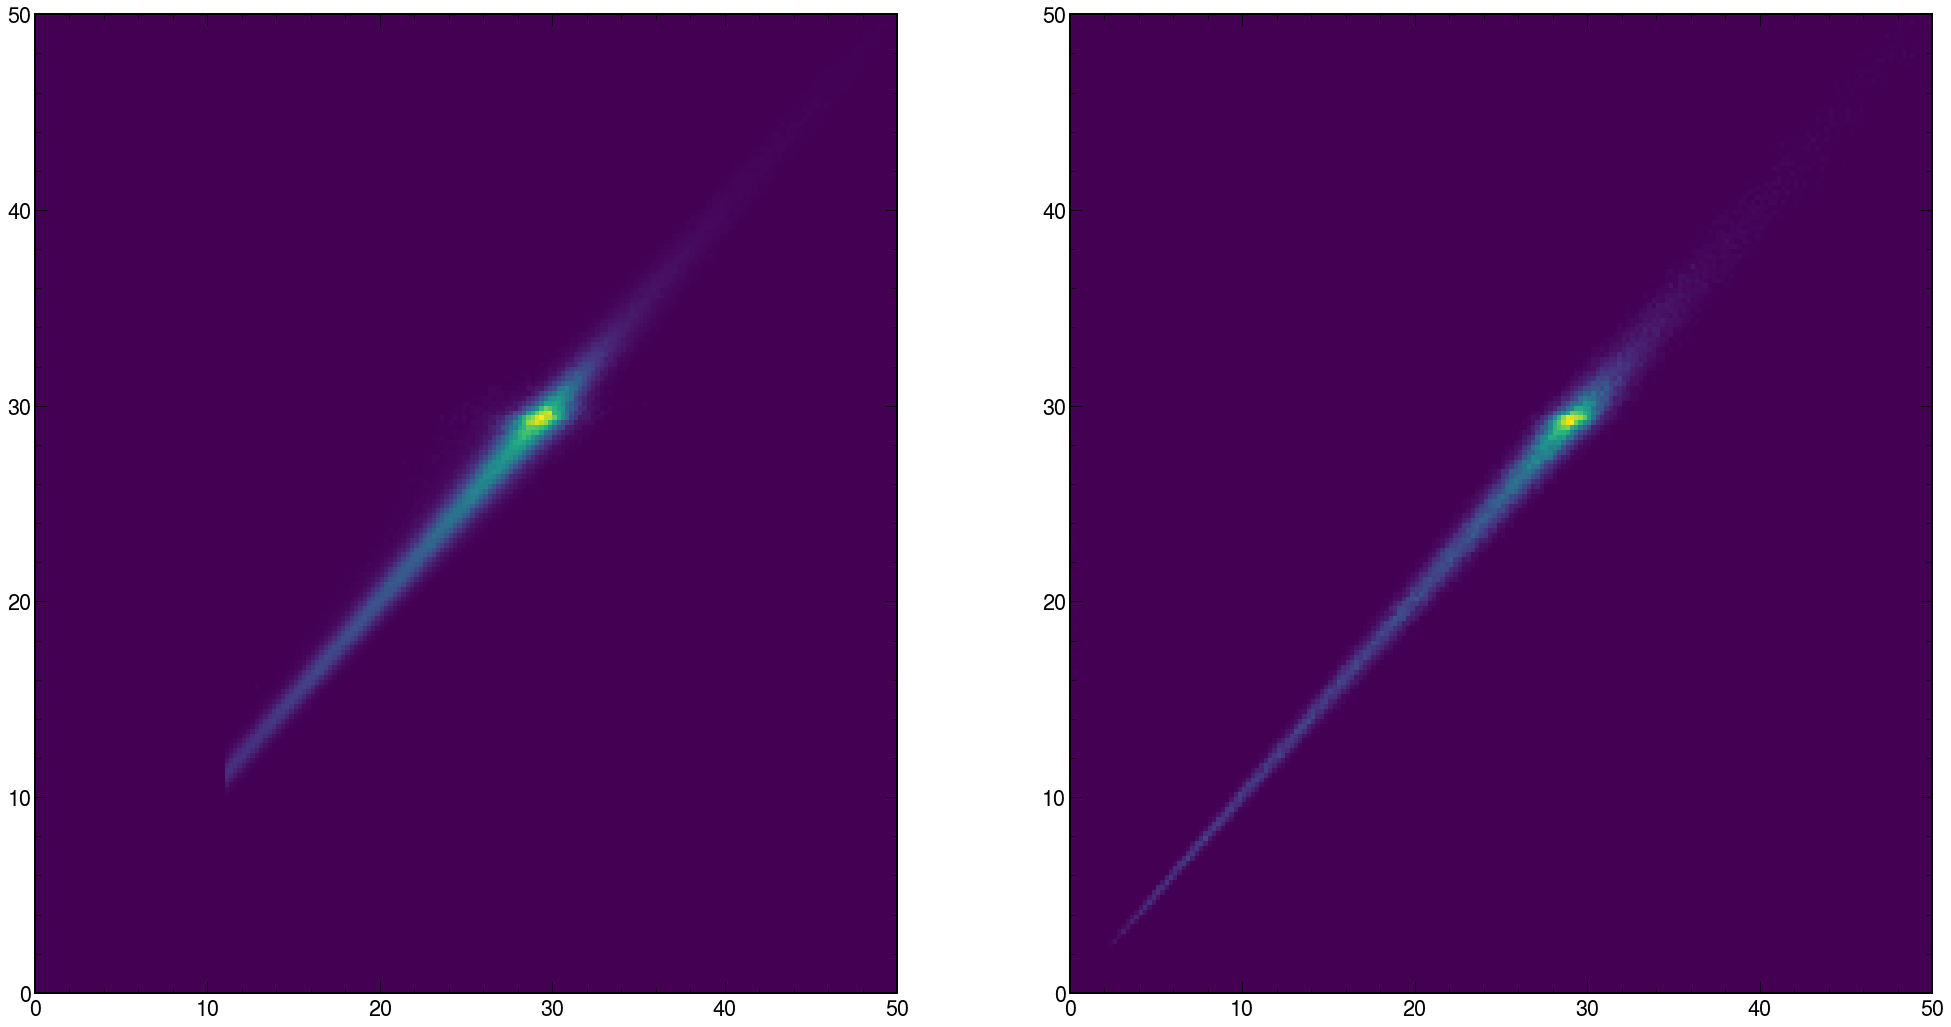

In [25]:
fig,ax = plt.subplots(1,2,figsize=(34,18))

ax[0].hist2d(mc_fullsim['e_e'],mc_fullsim['gene_p'],weights=mc_fullsim['wgt'],range=([0,50],[0,50]),bins=200)
ax[1].hist2d(mc_fastsim['e_e'],mc_fastsim['gene_p'],range=([0,50],[0,50]),bins=200)

plt.show()

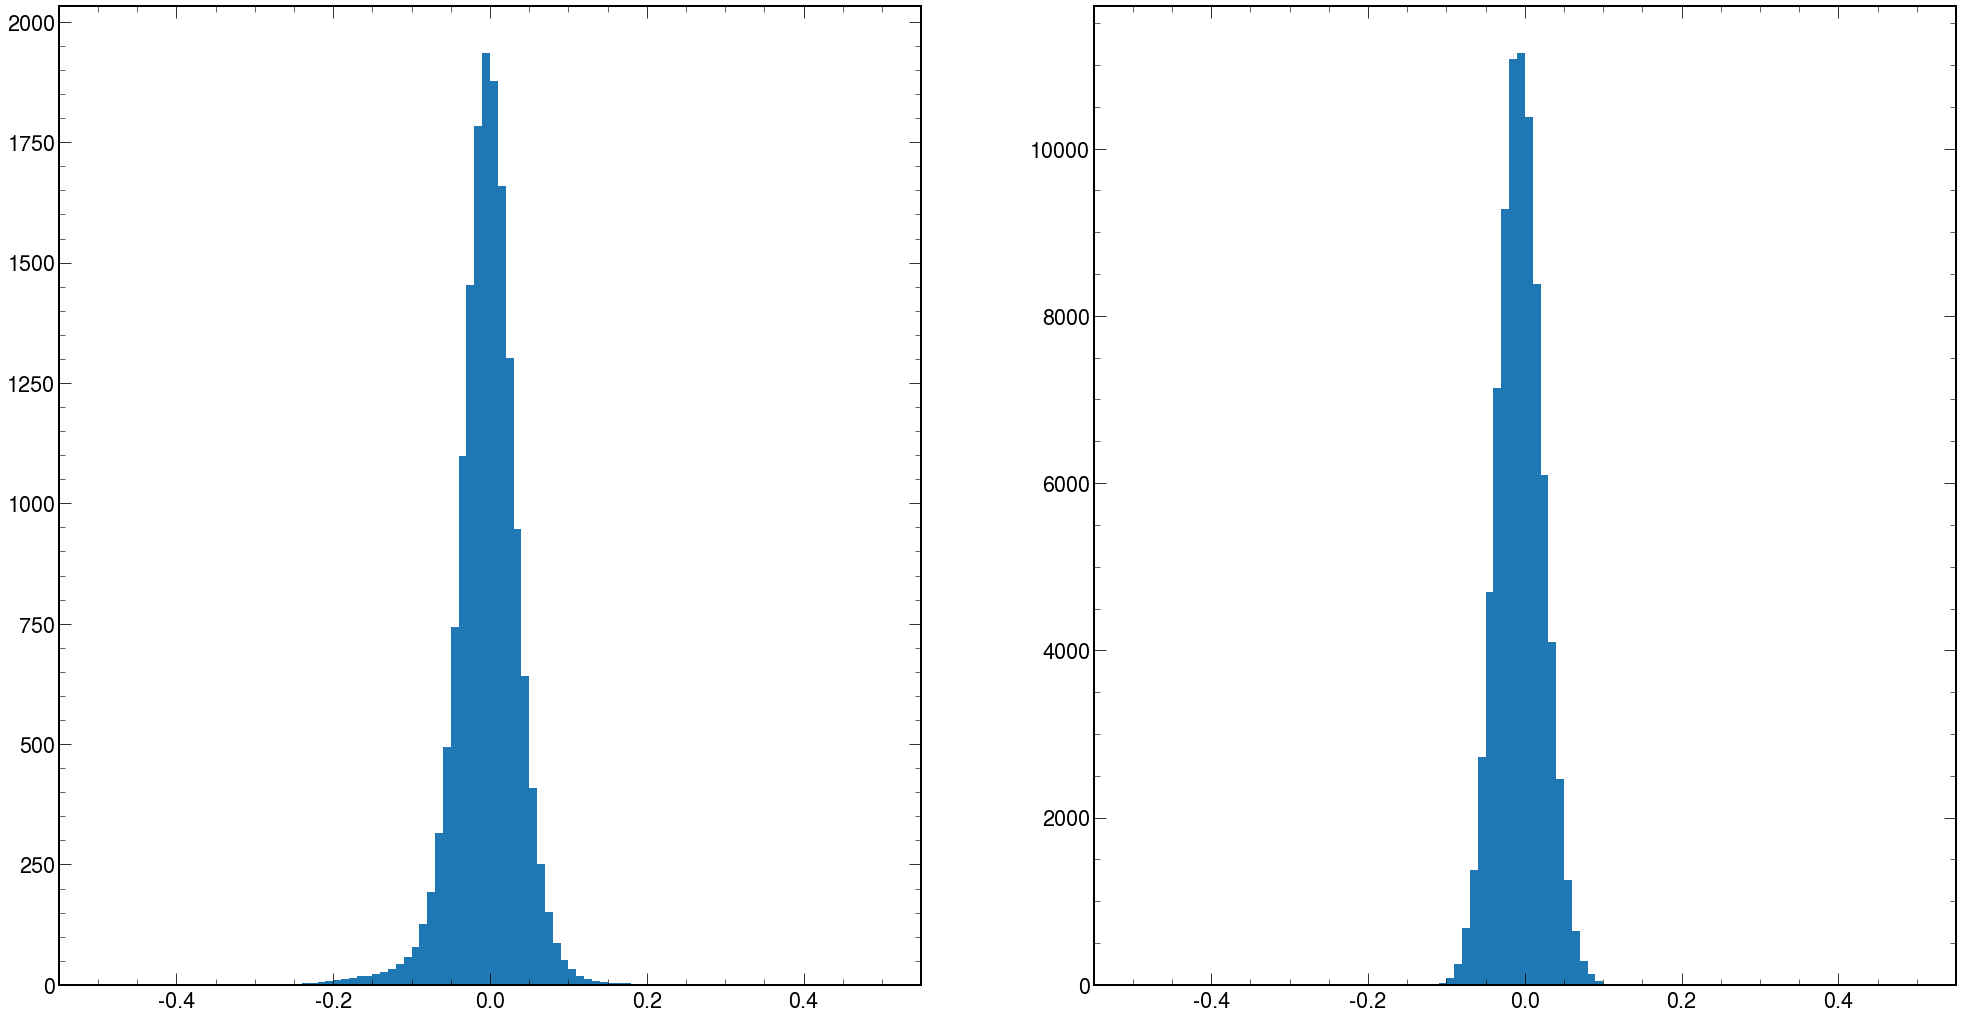

In [26]:
fig,ax = plt.subplots(1,2,figsize=(34,18))

ax[0].hist(mc_fullsim['p_res'],weights=mc_fullsim['wgt'],range=([-0.5,0.5]),bins=100)
ax[1].hist(mc_fastsim['p_res'],range=([-0.5,0.5]),bins=100)

plt.show()

['gen_y>0.5 and gen_y<0.7' 'gen_y>0.2 and gen_y<0.5'
 'gen_y>0.1 and gen_y<0.2' 'gen_y>0.05 and gen_y<0.1'
 'gen_y>0.01 and gen_y<0.05']
gen_y>0.5 and gen_y<0.7
gen_y>0.2 and gen_y<0.5
gen_y>0.1 and gen_y<0.2
gen_y>0.05 and gen_y<0.1
gen_y>0.01 and gen_y<0.05
gen_y>0.5 and gen_y<0.7
gen_y>0.2 and gen_y<0.5
gen_y>0.1 and gen_y<0.2
gen_y>0.05 and gen_y<0.1
gen_y>0.01 and gen_y<0.05


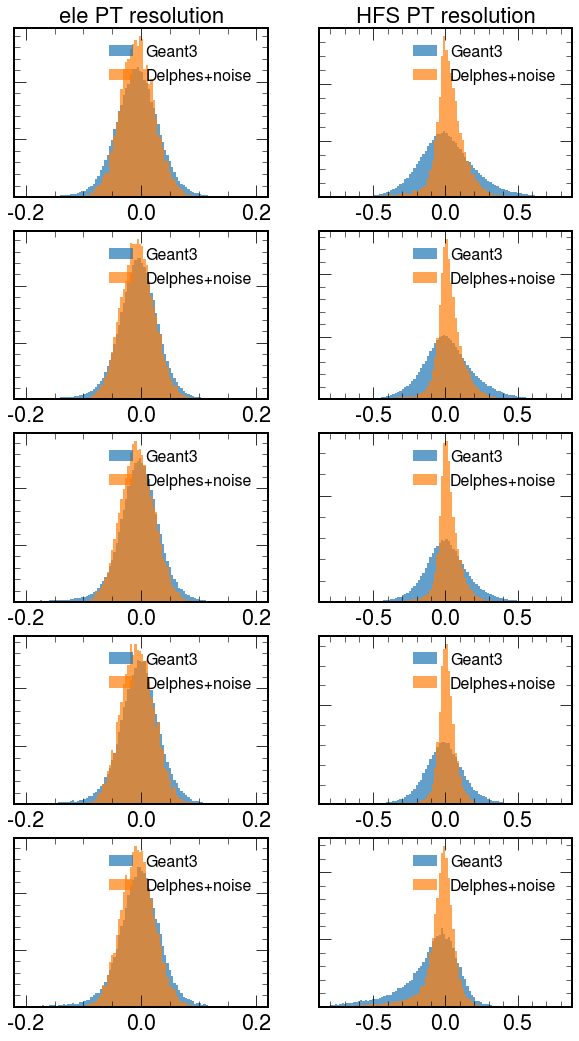

In [27]:
fig,ax = plt.subplots(5,2,figsize=(10,18))

ybins = np.array(['gen_y>0.5 and gen_y<0.7', 'gen_y>0.2 and gen_y<0.5',
                  'gen_y>0.1 and gen_y<0.2', 'gen_y>0.05 and gen_y<0.1','gen_y>0.01 and gen_y<0.05'])
print(ybins)

myalpha=0.7

for i in range(5):
    print(ybins[i])
    temp = mc_fullsim.query(ybins[i])
    ax[i][0].hist(temp['pt_res'],weights=temp['wgt'],density=True,bins=100,range=(-0.2,0.2),alpha=myalpha,label='Geant3')
    ax[i][1].hist(temp['HFSpt_res'],weights=temp['wgt'],density=True,bins=100,range=(-0.8,0.8),alpha=myalpha,label='Geant3')
    
for i in range(5):
    print(ybins[i])
    temp = mc_fastsim.query(ybins[i])
    ax[i][0].hist(temp['pt_res'],density=True,bins=100,range=(-0.2,0.2),alpha=myalpha,label=delphes_label)
    ax[i][1].hist(temp['HFSpt_res'],density=True,bins=100,range=(-0.8,0.8),alpha=myalpha,label=delphes_label)

ax = ax.flatten()

ax[0].set_title('ele PT resolution', fontsize=22)
ax[1].set_title('HFS PT resolution', fontsize=22)

for i in range(len(ax.flatten())):
    ax[i].legend(loc='best',fontsize=16)
    ax[i].set_yticklabels([])
    
plt.show()

In [28]:


fig = plt.figure( figsize=(8, 6))
temp = mc_fullsim.query('gen_Q2>0').groupby(pd.cut(mc_fullsim.query('gen_Q2>0')['gene_p'], bins=np.geomspace(10,120,12)))['p_res']
trim_mean = temp.apply(stats.trim_mean, 0.025)
trim_std = temp.apply(stats.mstats.trimmed_std, limits=(0.025,0.025))
temp = temp.agg(['mean', 'std', 'size']).reset_index()


x = [i.mid for i in temp['gene_p']]
print (x)

plt.plot(x, trim_std,'o-',label='G3 sigma')
#plt.plot(x, temp['std'],'o-',label='JER (trimmed)')
plt.plot(x, temp['mean'],'o-',label='G3 bias')



####
temp = mc_fastsim.query('gen_Q2>0').groupby(pd.cut(mc_fastsim.query('gen_Q2>0')['gene_p'], bins=np.geomspace(10,120,12)))['p_res']
trim_mean = temp.apply(stats.trim_mean, 0.025)
trim_std = temp.apply(stats.mstats.trimmed_std, limits=(0.025,0.025))
temp = temp.agg(['mean', 'std', 'size']).reset_index()


x = [i.mid for i in temp['gene_p']]
print (x)

plt.plot(x, trim_std,'o-',label='Delphes sigma')
#plt.plot(x, temp['std'],'o-',label='JER (trimmed)')
plt.plot(x, temp['mean'],'o-',label='Delphes bias')



x = [i.mid for i in temp['gene_p']]
print (x)

#plt.plot(x, trim_std,'o-',label='Delphes 2 sigma')
#plt.plot(x, temp['std'],'o-',label='JER (trimmed)')
#plt.plot(x, temp['mean'],'o-',label='Delphes 2 bias')


plt.xlabel('Generated electron p[GeV]',fontsize=22)
plt.legend(fontsize=22)
plt.grid()
#plt.ylim([-0.4,0.5])
plt.show()
plt.tight_layout()

ModuleNotFoundError: No module named 'scipy'

In [ ]:
fig = plt.figure( figsize=(8, 6))
temp = mc_fullsim.query('gen_Q2>0').groupby(pd.cut(mc_fullsim.query('gen_Q2>0')['genHFS_pt'], bins=np.geomspace(10,120,12)))['HFSpt_res']
trim_mean = temp.apply(stats.trim_mean, 0.025)
trim_std = temp.apply(stats.mstats.trimmed_std, limits=(0.025,0.025))
temp = temp.agg(['mean', 'std', 'size']).reset_index()


x = [i.mid for i in temp['genHFS_pt']]
print (x)

plt.plot(x, trim_std,'o-',label='G3 sigma')
#plt.plot(x, temp['std'],'o-',label='JER (trimmed)')
plt.plot(x, temp['mean'],'o-',label='G3 bias')



####
temp = mc_fastsim.query('gen_Q2>0').groupby(pd.cut(mc_fastsim.query('gen_Q2>0')['genHFS_pt'], bins=np.geomspace(10,120,12)))['HFSpt_res']
trim_mean = temp.apply(stats.trim_mean, 0.025)
trim_std = temp.apply(stats.mstats.trimmed_std, limits=(0.025,0.025))
temp = temp.agg(['mean', 'std', 'size']).reset_index()


x = [i.mid for i in temp['genHFS_pt']]
print (x)

plt.plot(x, trim_std,'o-',label='Delphes sigma')
#plt.plot(x, temp['std'],'o-',label='JER (trimmed)')
plt.plot(x, temp['mean'],'o-',label='Delphes bias')





#x = [i.mid for i in temp['genHFS_pt']]
#print (x)

#plt.plot(x, trim_std,'o-',label='Delphes sigma')
##plt.plot(x, temp['std'],'o-',label='JER (trimmed)')
#plt.plot(x, temp['mean'],'o-',label='Delphes bias')



plt.xlabel('HFS pt [GeV]',fontsize=22)
plt.legend(fontsize=22)
plt.grid()
#plt.ylim([-0.4,0.5])
plt.show()
plt.tight_layout()

In [ ]:
mc_fullsim.eval('e_phi = arctan2( e_py, e_px )', inplace = True )
mc_fastsim.eval('e_phi = arctan2( e_py, e_px )', inplace = True )

In [ ]:
fig,ax = plt.subplots(5,5,figsize=(18,18),sharey='col',sharex='col')
ax = ax.flatten()
ybins = np.array(['gen_y>0.5 and gen_y<0.7', 'gen_y>0.2 and gen_y<0.5',
                  'gen_y>0.1 and gen_y<0.2', 'gen_y>0.05 and gen_y<0.1','gen_y>0.01 and gen_y<0.05'])
print(ybins)

myalpha=0.7

for i in range(5):
    print(ybins[i])
    temp = mc_fullsim.query(ybins[i])
    ax[4 + 5*i].hist(temp['e_phi'],weights=temp['wgt'],density=True,bins=100,range=(-3.14159,3.14159),alpha=myalpha,label='Geant3')
    ax[3 + 5*i].hist(temp['e_py'],weights=temp['wgt'],density=True,bins=100,range=(-50,50),alpha=myalpha,label='Geant3')
    ax[2 + 5*i].hist(temp['e_px'],weights=temp['wgt'],density=True,bins=100,range=(-50,50),alpha=myalpha,label='Geant3')
    ax[1 + 5*i].hist(temp['e_pz'],weights=temp['wgt'],density=True,bins=100,range=(-30,0),alpha=myalpha,label='Geant3')
    ax[0 + 5*i].hist(temp['e_pt'],weights=temp['wgt'],density=True,bins=100,range=(5,40),alpha=myalpha,label='Geant3')



for i in range(5):
    print(ybins[i])
    temp = mc_fastsim.query(ybins[i])
    ax[4 + 5*i].hist(temp['e_phi'],density=True,bins=100,range=(-3.14159,3.14159),alpha=myalpha,label='Delphes')
    ax[3 + 5*i].hist(temp['e_py'],density=True,bins=100,range=(-50,50),alpha=myalpha,label='Delphes')
    ax[2 + 5*i].hist(temp['e_px'],density=True,bins=100,range=(-50,50),alpha=myalpha,label='Delphes')
    ax[1 + 5*i].hist(temp['e_pz'],density=True,bins=100,range=(-30,0),alpha=myalpha,label='Delphes')
    ax[0 + 5*i].hist(temp['e_pt'],density=True,bins=100,range=(5,40),alpha=myalpha,label='Delphes')


for i in range(len(ax.flatten())):
    ax[i].legend(loc='best')    
plt.subplots_adjust(wspace=0.1, hspace=0.1)

ax[0].set_title('e_pt')
ax[1].set_title('e_pz')
ax[2].set_title('e_px')
ax[3].set_title('e_py')
ax[4].set_title('e_phi')

#ax[2].set_title('hadron method')
#ax[3].set_title('$\Sigma$ method')


ax[0].set_ylabel(' $0.5<y_{true}<0.7$')
ax[5].set_ylabel(' $0.2<y_{true}<0.5$')
ax[10].set_ylabel(' $0.1<y_{true}<0.2$')
ax[15].set_ylabel(' $0.05<y_{true}<0.1$')
ax[20].set_ylabel(' $0.01<y_{true}<0.05$')
#ax[-1].set_xlabel(r'$x/x_{true}$ ')

#ax[-2].set_xlabel(r'$x/x_{true}$ ')
#ax[-3].set_xlabel(r'$x/x_{true}$ ')
#ax[-4].set_xlabel(r'$x/x_{true}$ ')

#ax[2].text(0.75, 0.5,r"Comparigon of $\bf{H1}$"+' full simulation (Django+G3) and fast-sim (Delphes)',
#                 horizontalalignment='center',multialignment='center',
#           verticalalignment='center', fontsize=30)

for i in range(len(ax.flatten())):
    ax[i].legend(loc='best',fontsize=16)  
    ax[i].set_yticklabels([])
plt.subplots_adjust(wspace=0.1, hspace=0.1)
#plt.xticks(fontsize=2)
#plt.yticks(fontsize=2)

plt.show()


